In [22]:
# pip install beautifulsoup4

import requests
from bs4 import BeautifulSoup
import numpy as np
import sys
import csv
np.set_printoptions(threshold=sys.maxsize)

f = open('datos.csv', 'w', newline='') 
escritor_csv = csv.writer(f, delimiter=";")
escritor_csv.writerow(['Rating','Title','Text'])

HEADERS = { 
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36', 
            'Accept' : 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8', 
            'Accept-Language' : 'en-US,en;q=0.5',
            'Accept-Encoding' : 'gzip', 
            'DNT' : '1', # Do Not Track Request Header 
            'Connection' : 'close'
            }
conjuntoURL = ["https://www.amazon.com/Terasako-Magnetic-Charging-Cable-5-Pack/product-reviews/B092QGDD6K/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
               "https://www.amazon.com/Magnetic-Charging-Terasako-Compatible-Smartphone/product-reviews/B07RHVNFQ6/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
               "https://www.amazon.com/Adaptive-Charger-Compatible-Samsung-Galaxy/product-reviews/B07V23QJ82/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
               "https://www.amazon.com/Charging-Braided-Compatible-Samsung-Charger/product-reviews/B08G124312/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
               "https://www.amazon.com/TOPK-Magnetic-Charging-Charger-Compatible/product-reviews/B094V9VXTF/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
               "https://www.amazon.com/Magnetic-1M-Portable-Apple-Certified-Wireless-Compatible/product-reviews/B0BQLNXX6Z/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
               "https://www.amazon.com/NEWDERY-Cordless-Portable-Wireless-Magnetic/product-reviews/B07ZFVYNRQ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
               "https://www.amazon.com/Samsung-Braided-Charging-Durable-Compatible/product-reviews/B07C97XFRL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
               "https://www.amazon.com/JSAUX-Charger-Braided-Compatible-Samsung/product-reviews/B076FPGWNZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
               "https://www.amazon.com/JSAUX-Charging-Compatible-Nintendo-Switch-Grey/product-reviews/B07DQM7WH5/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
               "https://www.amazon.com/JSAUX-Charging-Compatible-Nintendo-Switch-Grey/product-reviews/B07DQM7WH5/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
               "https://www.amazon.com/SMALLElectric-Braided-Charger-Samsung-Nintendo/product-reviews/B01I4ZOIQY/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="]

# conjuntoURL = ["https://www.amazon.com/-/es/paquete-unidades-r%C3%A1pida-cargador-r%C3%A1pido/product-reviews/B01I4ZOIQY/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber="]
for url in conjuntoURL:
    pag = 0
    while(True):
        pag += 1
        print("PAGINA NUMERO: {}".format(pag))
        urlTrue = url.replace('pageNumber=','pageNumber='+str(pag))
        response = requests.post(urlTrue, headers=HEADERS)
        soup = BeautifulSoup(response.text, 'html.parser')
        reviews = soup.find_all('div',{'data-hook':'review'}) #data-hook="review"
        if(reviews == []):
            break
        
        for review in reviews:
            rating = review.find('i', {'data-hook': 'review-star-rating'})
            if (rating is None):
                rating = review.find('i', {'data-hook': 'cmps-review-star-rating'})
            rating = rating.text
            title = review.find('a', {'data-hook': 'review-title'})
            if (title is None):
                title = review.find('span', {'data-hook': 'review-title'})
            title = title.text.strip()
            #date = review.find('span', {'data-hook': 'review-date'}).text
            text = review.find('span', {'data-hook': 'review-body'}).text.strip().replace(';','.')
            escritor_csv.writerow([rating,title,text])
    print('\n\nURL FINALIZADA\n\n')

f.close()

PAGINA NUMERO: 1
PAGINA NUMERO: 2
PAGINA NUMERO: 3
PAGINA NUMERO: 4
PAGINA NUMERO: 5
PAGINA NUMERO: 6
PAGINA NUMERO: 7
PAGINA NUMERO: 8
PAGINA NUMERO: 9
PAGINA NUMERO: 10
PAGINA NUMERO: 11
PAGINA NUMERO: 12
PAGINA NUMERO: 13
PAGINA NUMERO: 14
PAGINA NUMERO: 15
PAGINA NUMERO: 16
PAGINA NUMERO: 17
PAGINA NUMERO: 18
PAGINA NUMERO: 19
PAGINA NUMERO: 20
PAGINA NUMERO: 21
PAGINA NUMERO: 22
PAGINA NUMERO: 23
PAGINA NUMERO: 24
PAGINA NUMERO: 25
PAGINA NUMERO: 26
PAGINA NUMERO: 27
PAGINA NUMERO: 28
PAGINA NUMERO: 29
PAGINA NUMERO: 30
PAGINA NUMERO: 31
PAGINA NUMERO: 32
PAGINA NUMERO: 33
PAGINA NUMERO: 34
PAGINA NUMERO: 35
PAGINA NUMERO: 36
PAGINA NUMERO: 37
PAGINA NUMERO: 38
PAGINA NUMERO: 39
PAGINA NUMERO: 40
PAGINA NUMERO: 41
PAGINA NUMERO: 42
PAGINA NUMERO: 43
PAGINA NUMERO: 44
PAGINA NUMERO: 45
PAGINA NUMERO: 46
PAGINA NUMERO: 47
PAGINA NUMERO: 48
PAGINA NUMERO: 49
PAGINA NUMERO: 50
PAGINA NUMERO: 51
PAGINA NUMERO: 52
PAGINA NUMERO: 53
PAGINA NUMERO: 54
PAGINA NUMERO: 55
PAGINA NUMERO: 56
P

In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv('datos.csv', header=0, sep=';')
indices1E = np.random.choice([True, False], size=df['Rating'].value_counts().loc['1.0 out of 5 stars'], p=[.5, .5])
indices4E = np.random.choice([True, False], size=df['Rating'].value_counts().loc['4.0 out of 5 stars'], p=[.6, .4])
indices5E = np.random.choice([True, False], size=df['Rating'].value_counts().loc['5.0 out of 5 stars'], p=[.1, .9])

dfFinal = pd.DataFrame(columns=df.columns)
unoE = 0
cuatroE = 0
cincoE = 0
for index, row in df.iterrows():
    if(row['Rating'] == '2.0 out of 5 stars' or row['Rating'] == '3.0 out of 5 stars'):
        dfFinal = dfFinal.append(row,ignore_index=True)
    elif(row['Rating'] == '1.0 out of 5 stars'):
        if(indices1E[unoE]):
            dfFinal = dfFinal.append(row,ignore_index=True)
        unoE+=1
    elif(row['Rating'] == '4.0 out of 5 stars'):
        if(indices4E[cuatroE]):
            dfFinal = dfFinal.append(row,ignore_index=True)
        cuatroE+=1
    else:
        if(indices5E[cincoE]):
            dfFinal = dfFinal.append(row,ignore_index=True)
        cincoE+=1

dfFinal['Rating'].value_counts()

,Rating,Title,Text
0,4.0 out of 5 stars,Charges nicely but….,These magnetic chargers are doing the job and ...
1,4.0 out of 5 stars,Works as expected super convenient charging,Was hesitant to believe these would work but t...
2,4.0 out of 5 stars,Durable,I like there was different size cords. Cords a...
3,4.0 out of 5 stars,so far so good ...,"For apple device, just make sure you have the ..."
4,4.0 out of 5 stars,Does what it says,So far seem like decent cables. Just wish they...
...,...,...,...
9280,5.0 out of 5 stars,Great charger,Cord length was perfect and I like how durable...
9281,2.0 out of 5 stars,Crap charge,50% phone battery life. When plugged in to cha...
9282,4.0 out of 5 stars,Chargers,It's okay but didn't charge phone that fast.
9283,2.0 out of 5 stars,Will not connect regularly.,"Constantly connects, then disconnects. When it..."


In [45]:
dfFinal.to_csv('datosFinal.csv',sep=';',index=False)

5.0 out of 5 stars    20046
1.0 out of 5 stars     3815
4.0 out of 5 stars     3307
3.0 out of 5 stars     1920
2.0 out of 5 stars     1512
Name: Rating, dtype: int64


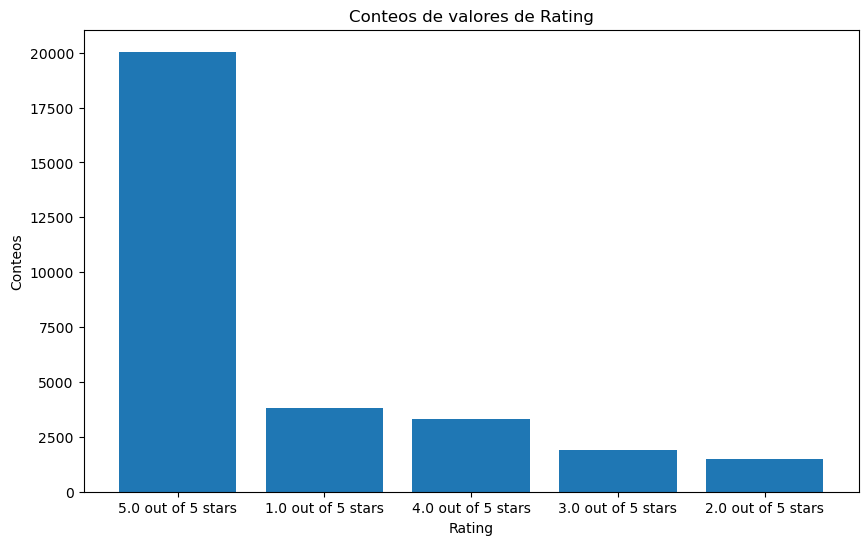

In [6]:
import pandas as pd
dfAux = pd.read_csv('datos.csv', header=0, sep=';')
print(dfAux['Rating'].value_counts())

import matplotlib.pyplot as plt

# Obtener los conteos de valores de la columna 'Rating'
plt.figure(figsize=(10,6))
conteos = dfAux['Rating'].value_counts()

# Crear la gráfica de barras
plt.bar(conteos.index, conteos.values)

# Configurar los títulos de la gráfica y los ejes
plt.title('Conteos de valores de Rating')
plt.xlabel('Rating')
plt.ylabel('Conteos')

# Mostrar la gráfica
plt.show()

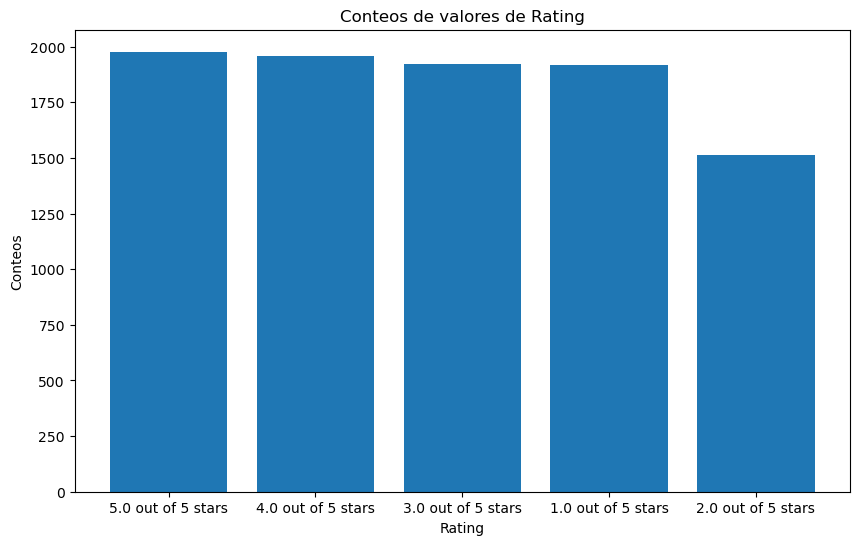

In [3]:
dfAux = pd.read_csv('datosFinal.csv', header=0, sep=';')
dfAux['Rating'].value_counts()

# Obtener los conteos de valores de la columna 'Rating'
conteos = dfAux['Rating'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10,6))
plt.bar(conteos.index, conteos.values)

# Configurar los títulos de la gráfica y los ejes
plt.title('Conteos de valores de Rating')
plt.xlabel('Rating')
plt.ylabel('Conteos')

# Mostrar la gráfica
plt.show()